# **`Importing Relevant Libraries`**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# reading the csv file
df = pd.read_csv('Australian Vehicle Prices.csv')

In [3]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

We see that our data has only one column 'Year' that has data type float, while all the other columns have data type object. \
There are some irrelevant columns that we pose a problem to us if we keep them in the dataset, so we are dropping them.

In [5]:
df = df.drop(['Title','ColourExtInt','Model','Car/Suv'],axis=1)

Converting values of the columns 'FuelConsumption', 'Location', 'Engine', 'CylindersinEngine', 'Doors' and 'Seats', so that they can be operable.

In [6]:
df['FuelConsumption']=df['FuelConsumption'].str.split('/').str[0].str.split().str[0]
df['Location']=df['Location'].str.split(',').str[1].str.strip()
df['Engine'] = df['Engine'].str.split(',').str[1].str.split().str[0]
df['CylindersinEngine'] = df['CylindersinEngine'].str.split().str[0]
df['Doors']= df['Doors'].str.split().str[0]
df['Seats'] = df['Seats'].str.split().str[0]

Replacing '-' and 'POA' with null values. 

In [7]:
df.replace(['-','POA'],np.NAN,inplace=True)

Checking for the missing values

In [8]:
df.isnull().sum()

Brand                   1
Year                    1
UsedOrNew               1
Transmission          252
Engine               1783
DriveType               1
FuelType              638
FuelConsumption      1698
Kilometres            143
Location              450
CylindersinEngine    1675
BodyType              282
Doors                1604
Seats                1705
Price                  53
dtype: int64

Checking for the percentage of data missing from each column.

In [9]:
print("Percentage of data missing from each column")
df.isnull().sum()/len(df)*100

Percentage of data missing from each column


Brand                 0.005976
Year                  0.005976
UsedOrNew             0.005976
Transmission          1.505916
Engine               10.654954
DriveType             0.005976
FuelType              3.812597
FuelConsumption      10.147006
Kilometres            0.854548
Location              2.689136
CylindersinEngine    10.009561
BodyType              1.685192
Doors                 9.585275
Seats                10.188837
Price                 0.316720
dtype: float64

# **`Data Preprocessing`**

Engine, FuelConsumption, CylindersinEngine, Doors, Seats have more than 5% data missing, so we cannot drop them since it will lose a lot of information from the data. However we drop the null values from any other column.

In [10]:
df.dropna(subset=['Location','BodyType','Price','Transmission','FuelType','Kilometres'], inplace=True)

For the columns Engine, FuelConsumption, CylindersinEngine, Doors, and Seats, we fill the missing values with the mode obtained from the given data of each column.

In [11]:
df['Engine'].fillna(df[~df['Engine'].isnull()]['Engine'].str.strip().astype(float).mode()[0],inplace=True)
df['FuelConsumption'].fillna(df[~df['FuelConsumption'].isnull()]['FuelConsumption'].str.strip().astype(float).mode()[0],inplace=True)
df['CylindersinEngine'].fillna(df[~df['CylindersinEngine'].isnull()]['CylindersinEngine'].str.strip().astype(int).mode()[0],inplace=True)
df['Doors'].fillna(df[~df['Doors'].isnull()]['Doors'].str.strip().astype(int).mode()[0],inplace=True)
df['Seats'].fillna(df[~df['Seats'].isnull()]['Seats'].str.strip().astype(int).mode()[0],inplace=True)

Now we convert the data types of the columns - Engine, FuelConsumption, Kilometres, CylindersinEngine, Doors, Seats and Prices into integer or float  as per needed.

In [12]:
df['Engine'] = df['Engine'].astype(float)
df['FuelConsumption'] = df['FuelConsumption'].astype(float)
df['Kilometres'] = df['Kilometres'].astype(float)
df['CylindersinEngine']=df['CylindersinEngine'].astype(int)
df['Doors'] = df['Doors'].astype(int)
df['Seats'] = df['Seats'].astype(int)
df['Price'] = df['Price'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15306 entries, 0 to 16733
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              15306 non-null  object 
 1   Year               15306 non-null  float64
 2   UsedOrNew          15306 non-null  object 
 3   Transmission       15306 non-null  object 
 4   Engine             15306 non-null  float64
 5   DriveType          15306 non-null  object 
 6   FuelType           15306 non-null  object 
 7   FuelConsumption    15306 non-null  float64
 8   Kilometres         15306 non-null  float64
 9   Location           15306 non-null  object 
 10  CylindersinEngine  15306 non-null  int32  
 11  BodyType           15306 non-null  object 
 12  Doors              15306 non-null  int32  
 13  Seats              15306 non-null  int32  
 14  Price              15306 non-null  float64
dtypes: float64(5), int32(3), object(7)
memory usage: 1.7+ MB


In [14]:
df.head()

,Brand,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,NSW,4,SUV,4,7,51990.0
1,MG,2022.0,USED,Automatic,1.5,Front,Premium,6.7,16.0,NSW,4,Hatchback,5,5,19990.0
2,BMW,2022.0,USED,Automatic,2.0,Rear,Premium,6.6,8472.0,NSW,4,Coupe,2,4,108988.0
3,Mercedes-Benz,2011.0,USED,Automatic,5.5,Rear,Premium,11.0,136517.0,NSW,8,Coupe,2,4,32990.0
4,Renault,2022.0,USED,Automatic,1.3,Front,Unleaded,6.0,1035.0,NSW,4,SUV,4,5,34990.0


We notice that our data is consistent without any missing value, so we will use this data for the EDA.

# **`Summary Statistics`**

In [15]:
df[['Engine','FuelConsumption','Kilometres','Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Engine,15306.0,2.386019,0.843115,0.7,2.00,2.0,2.80,7.3
FuelConsumption,15306.0,7.723429,2.139530,0.0,6.70,7.5,8.70,27.0
Kilometres,15306.0,101290.290017,78140.256535,1.0,42852.25,86690.5,147681.75,533849.0
Price,15306.0,35071.470273,31858.822964,88.0,18950.00,28950.0,41999.00,1500000.0


- The average engine capacity of a vehicle is 2.386 Litres with a standard deviation of 0.84 Litres.
- On an average 7.7 litres per 100 km of fuel is consumed by a vehicle.
- On an average 101290.29 km is covered by a vehicle. The standard deviation is high, which can seen from the fact that the range is quite large from 1-533849 km.
- On an average a vehicle cost 35071.47 Australian Dollars. The standard deviation is high, which can seen from the fact that the range is quite large from 88-1500000 Australian Dollars.

# **`Exploratory Data Analysis`**

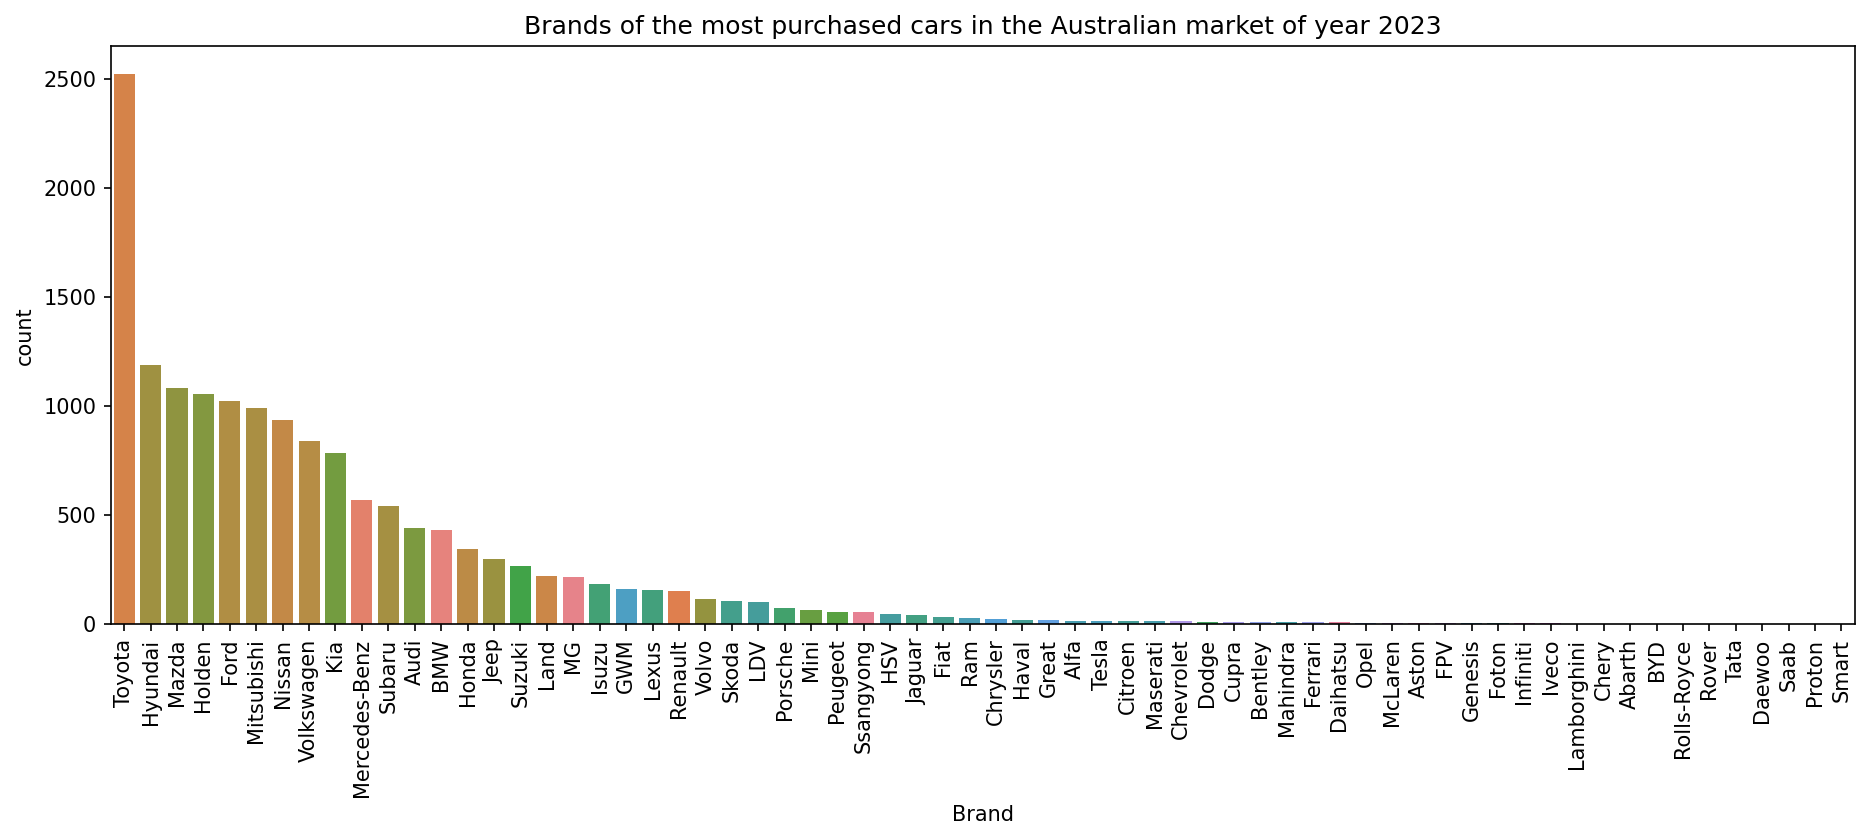

In [16]:
plt.figure(figsize=(15,5),dpi=150)
sns.countplot(data=df, x='Brand',hue='Brand',order=df['Brand'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Brands of the most purchased cars in the Australian market of year 2023');

The above countplot shows that the brand which had the highest sales in the Australian market in the year 2023 is Toyota, followed by Hyundai, Mazda, Holden and Ford. The brand of the vehicle having the least sales is Smart.

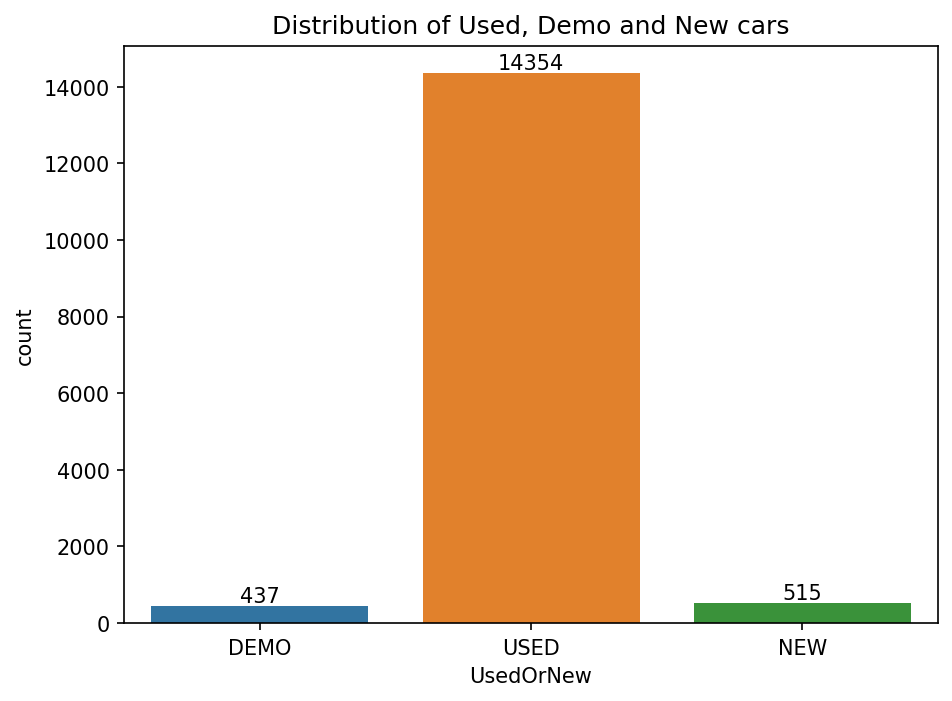

In [17]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='UsedOrNew', hue='UsedOrNew')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Distribution of Used, Demo and New cars');

Of the 15306 cars that we are using in our study, 14354 of them are used cars while 437 of the are demo cars and only 515 are new.

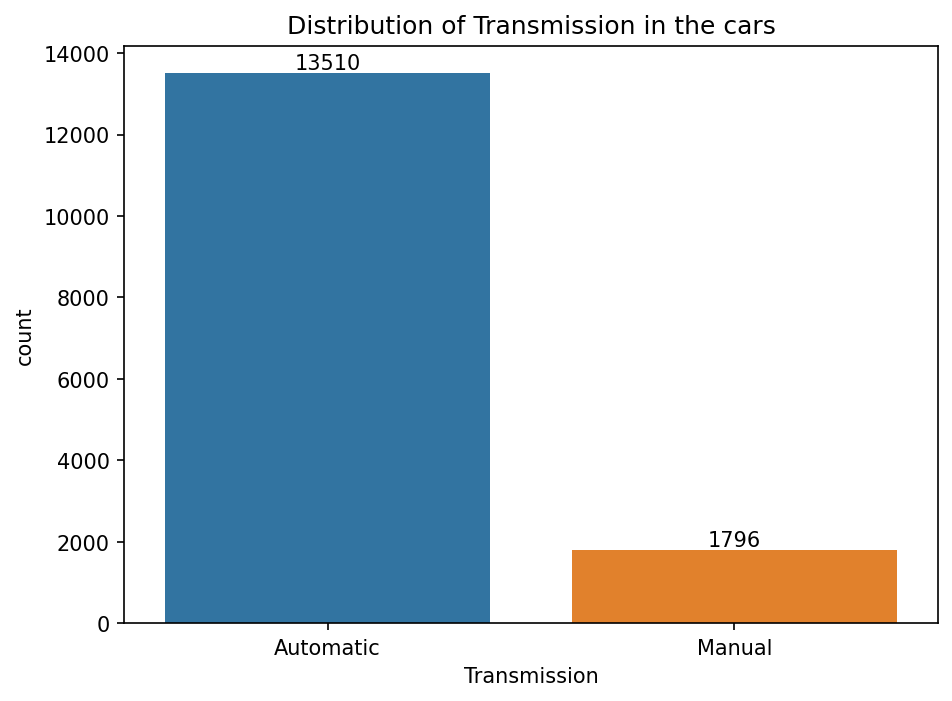

In [18]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='Transmission',hue='Transmission')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Transmission in the cars');

13510 cars that are sold in the market were automatic and 1796 cars were manual.

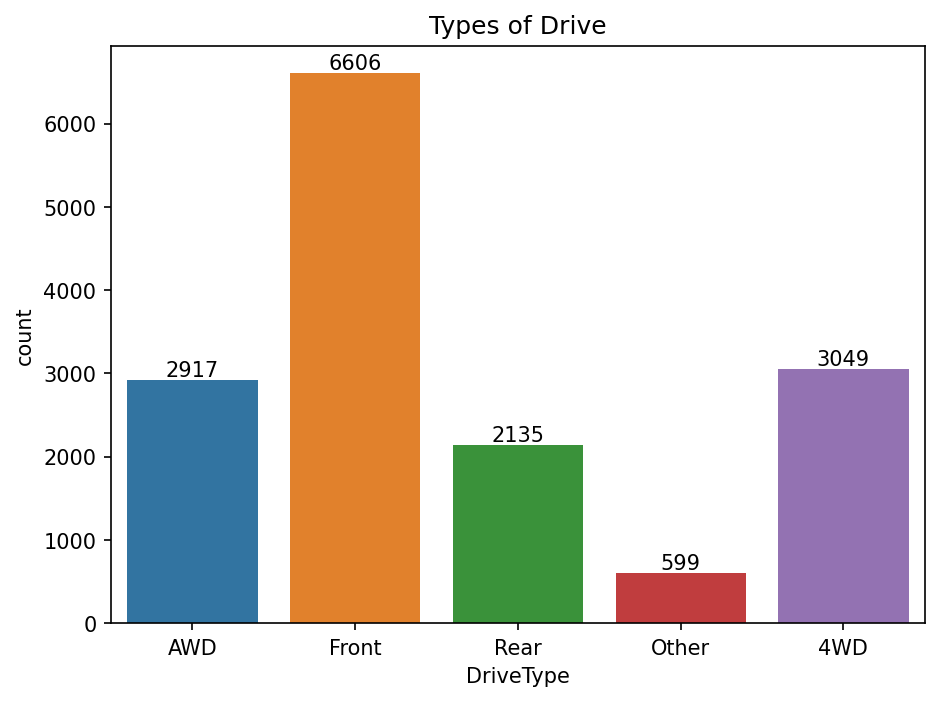

In [19]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='DriveType',hue='DriveType')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Types of Drive');

The above countplot shows the distribution of cars according to the type of drive. The numbers for Front wheel is high.

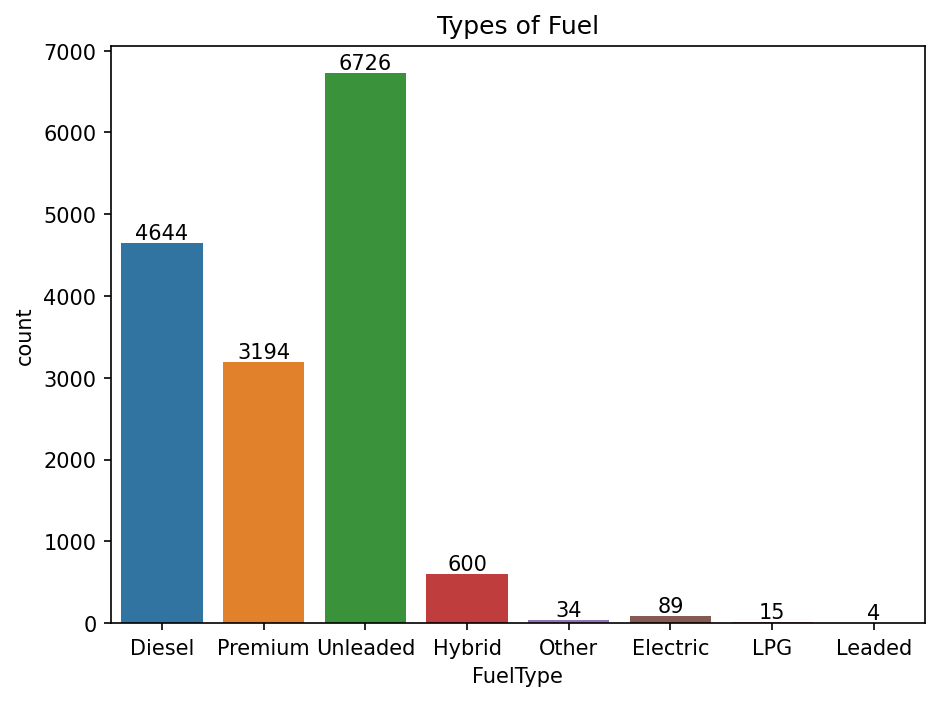

In [20]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='FuelType',hue='FuelType')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Types of Fuel');

A high number of cars used unleaded fuel.

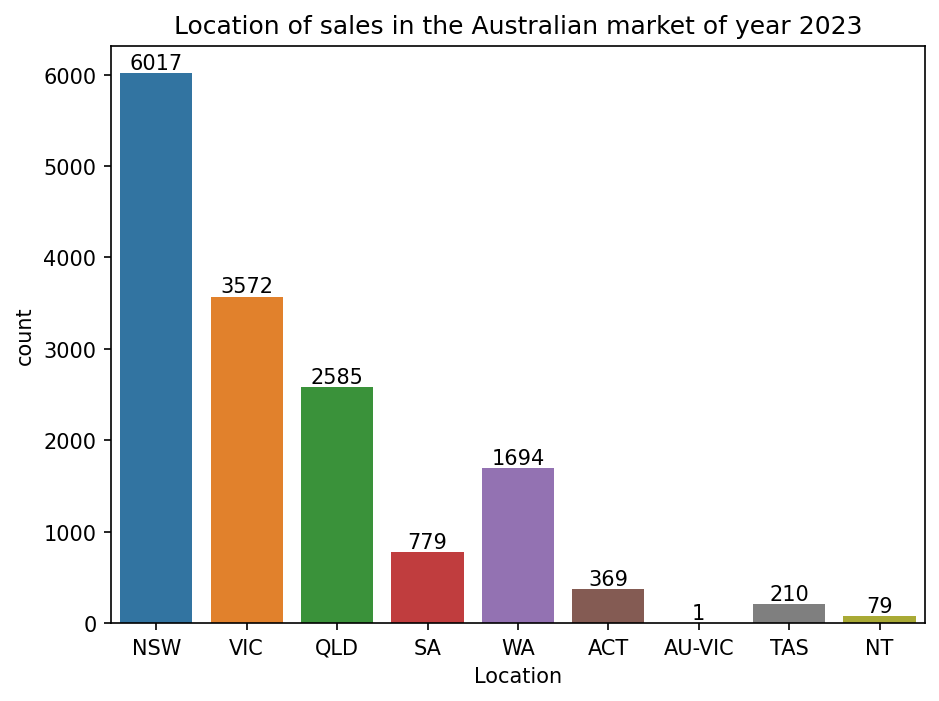

In [21]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='Location', hue='Location')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Location of sales in the Australian market of year 2023');

New South Wales had the highest number of sales of cars, followed by Victoria.

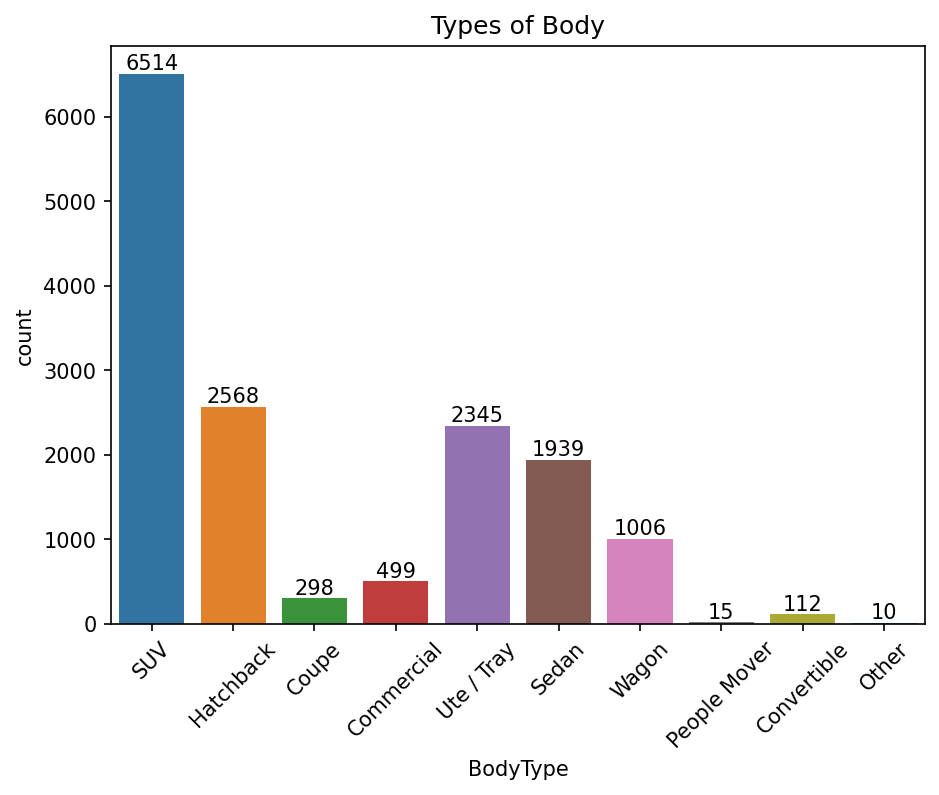

In [22]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='BodyType',hue='BodyType')
for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation=45)
plt.title('Types of Body');

Car Body type of SUVs are most in demand.

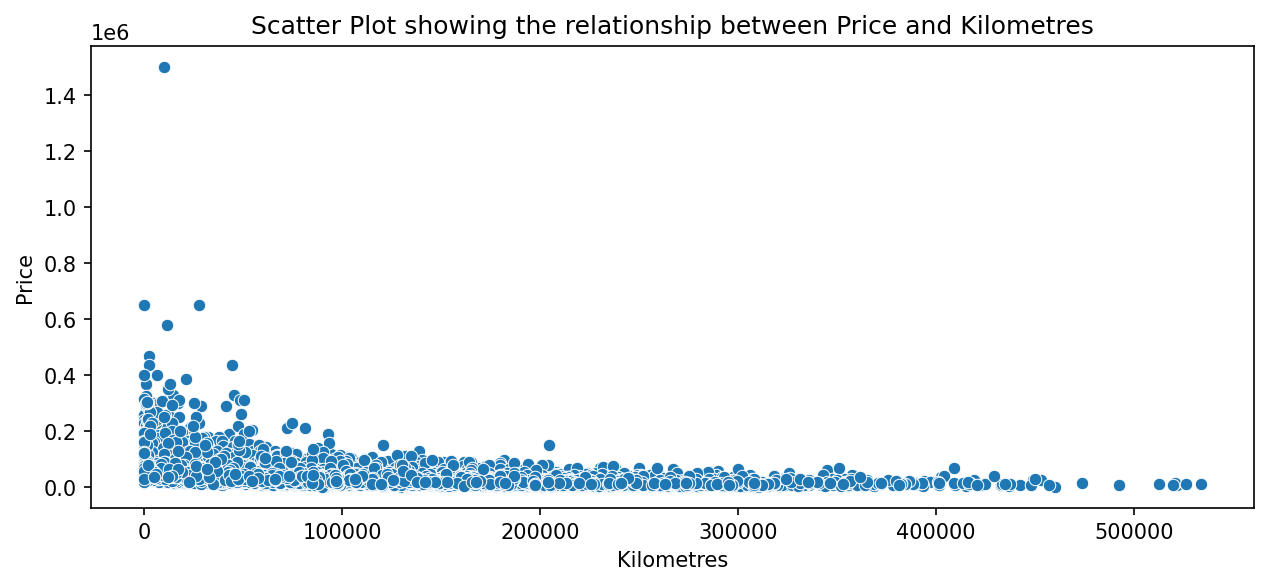

In [23]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='Kilometres',y='Price')
plt.title('Scatter Plot showing the relationship between Price and Kilometres');

**`Insights from the above scatterplot`** 
- Most of the clusters are seen at the left bottom of the figure which signifies that a car with low price will cover short distances. 
- Outliers can be seen. There is a car which has a very high price but covers less than 10 km. Also, there are several cars which have low prices but covers large distances.

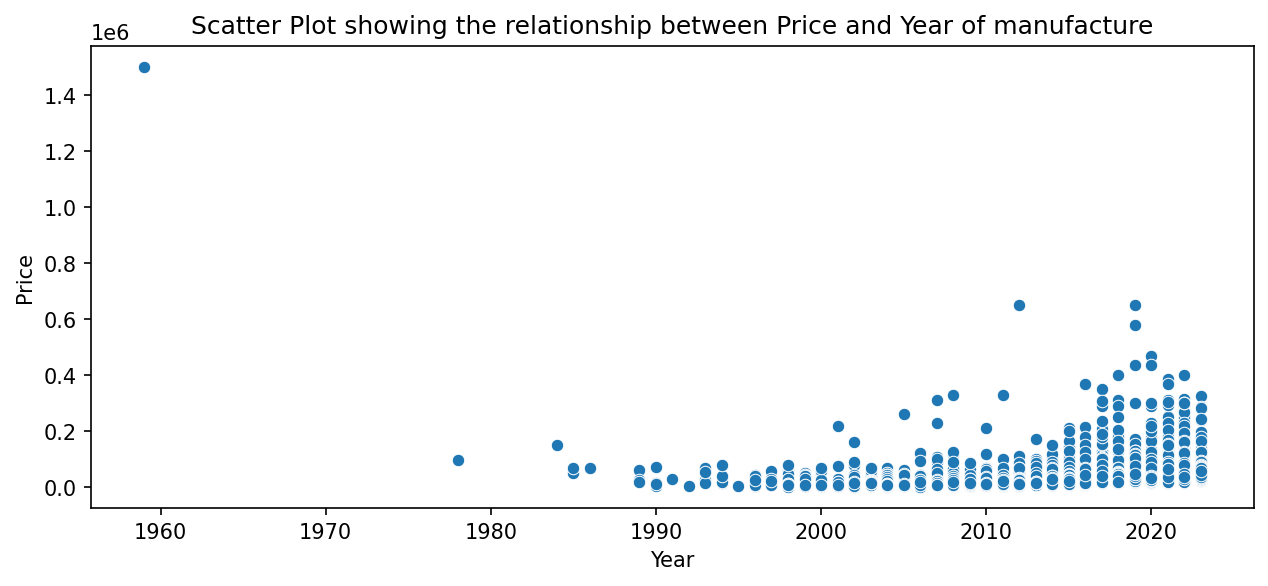

In [24]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='Year',y='Price')
plt.title('Scatter Plot showing the relationship between Price and Year of manufacture');

**`Insights from the above scatterplot`** 
- Most of the clusters are seen at the right bottom of the figure which signifies that a car has low price and is manufactured or released after 2000. 
- There is a car which has a very high price but was manufactured or released before 1960. 

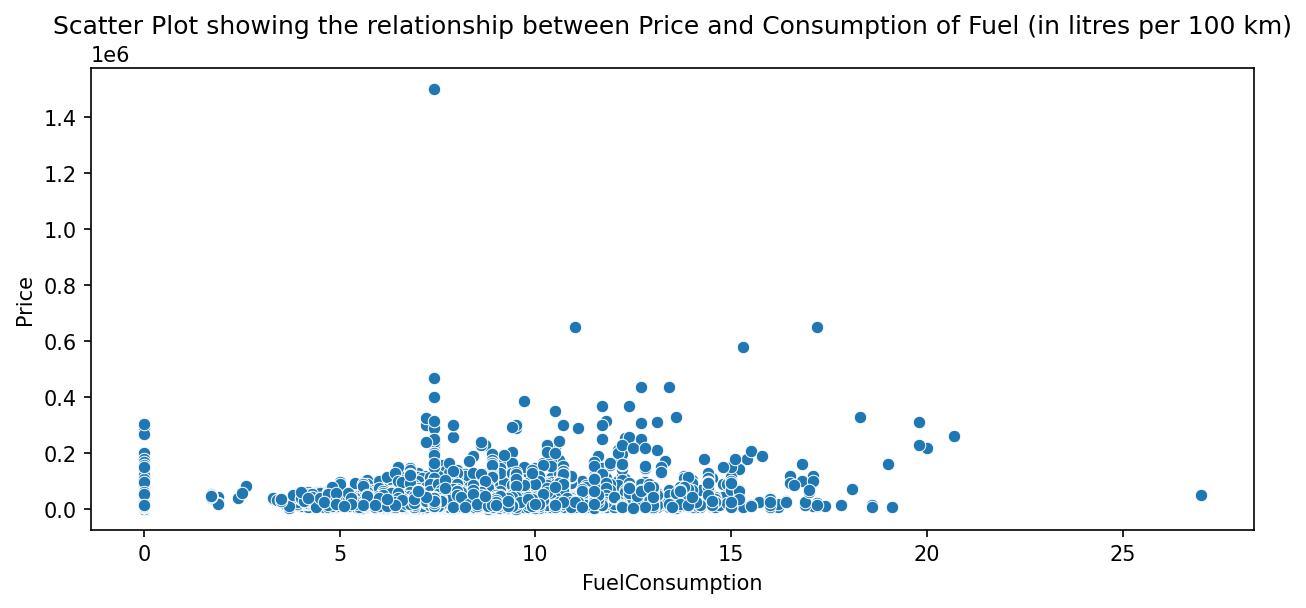

In [25]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='FuelConsumption',y='Price')
plt.title('Scatter Plot showing the relationship between Price and Consumption of Fuel (in litres per 100 km)');

**`Insights from the above scatterplot`** 
- Most of the clusters are seen at the bottom of the figure which signifies that a car has low price and consumes around 5-15 litres per of fuel 100 km. 
- There are several cars that have consumed no fuel at all.
- There is a car which has a very high price but has consumed less than 10 litres (per 100 km) of fuel. 

In [26]:
df[df['Year']<1960]

,Brand,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
15313,Ferrari,1959.0,USED,Manual,2.0,Rear,Unleaded,7.4,9902.0,NSW,4,Coupe,4,5,1500000.0


We found out that the car which is considerably the outlier in all previous cases is an Used Ferrari which is at sale in New South Wales and costs 1500000 Australian Dollars. This is may be due to the fact that it is vintage and on high demand.

Let us remove this outlier in order to have a better look at all the other cases.

In [27]:
df=df.drop(15313)

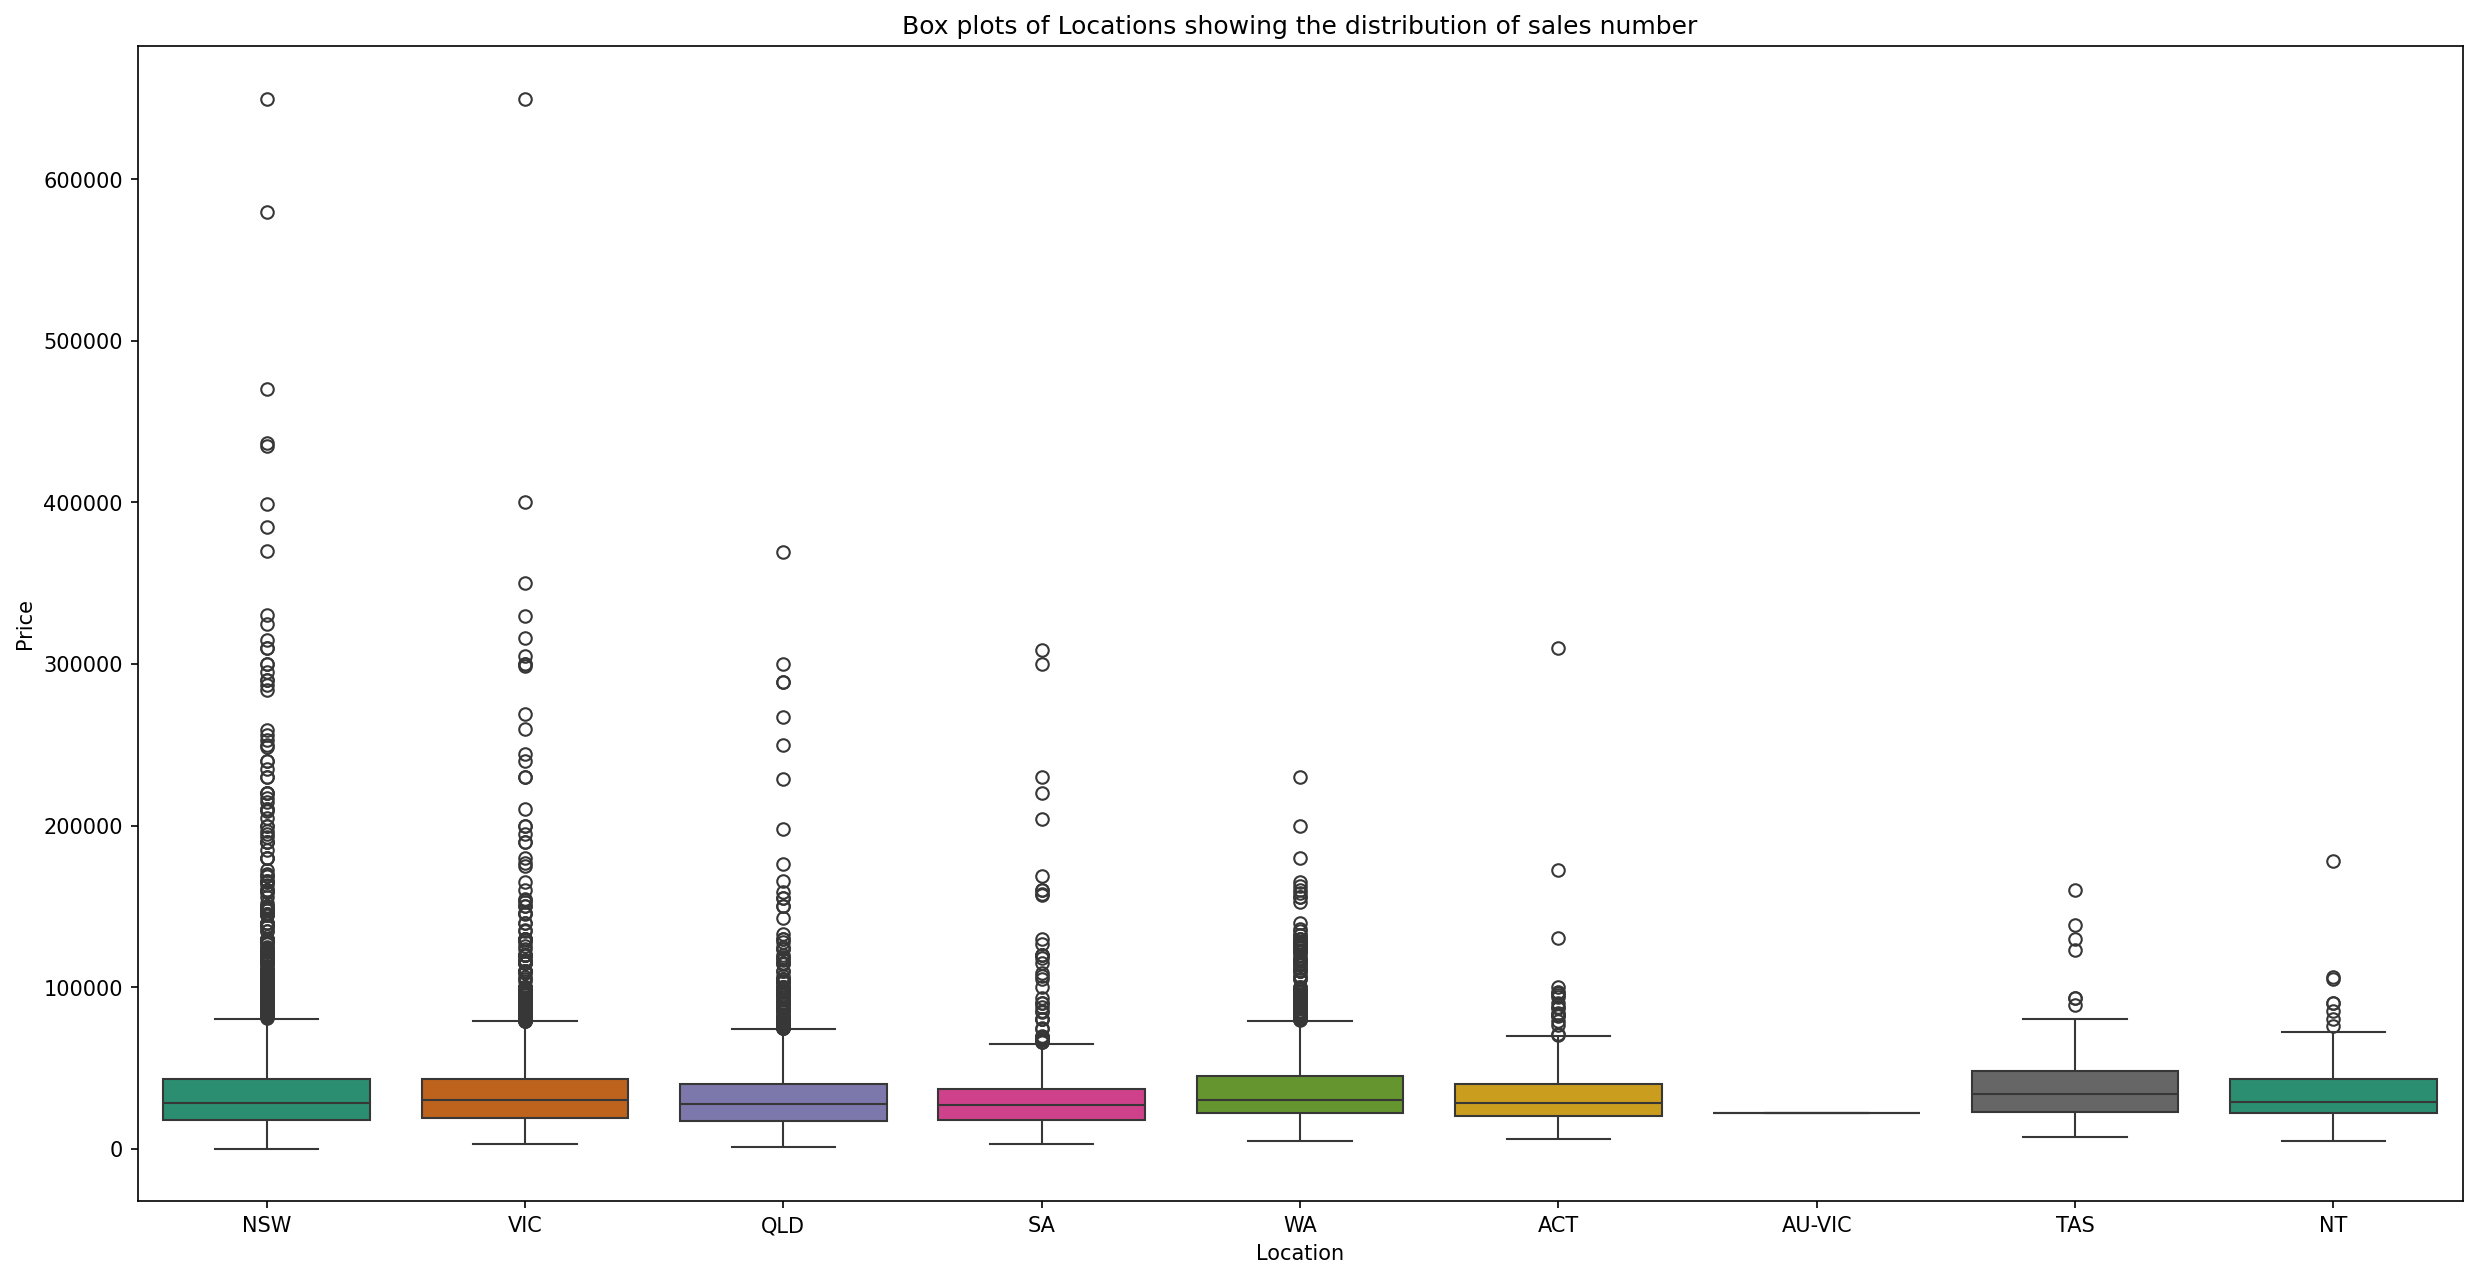

In [28]:
plt.figure(figsize=(20,10),dpi=150)
sns.boxplot(x=df['Location'],y=df['Price'],palette='Dark2')
plt.title('Box plots of Locations showing the distribution of sales number');

The distribtion of prices in each location is highly positively skewed with many outliers.

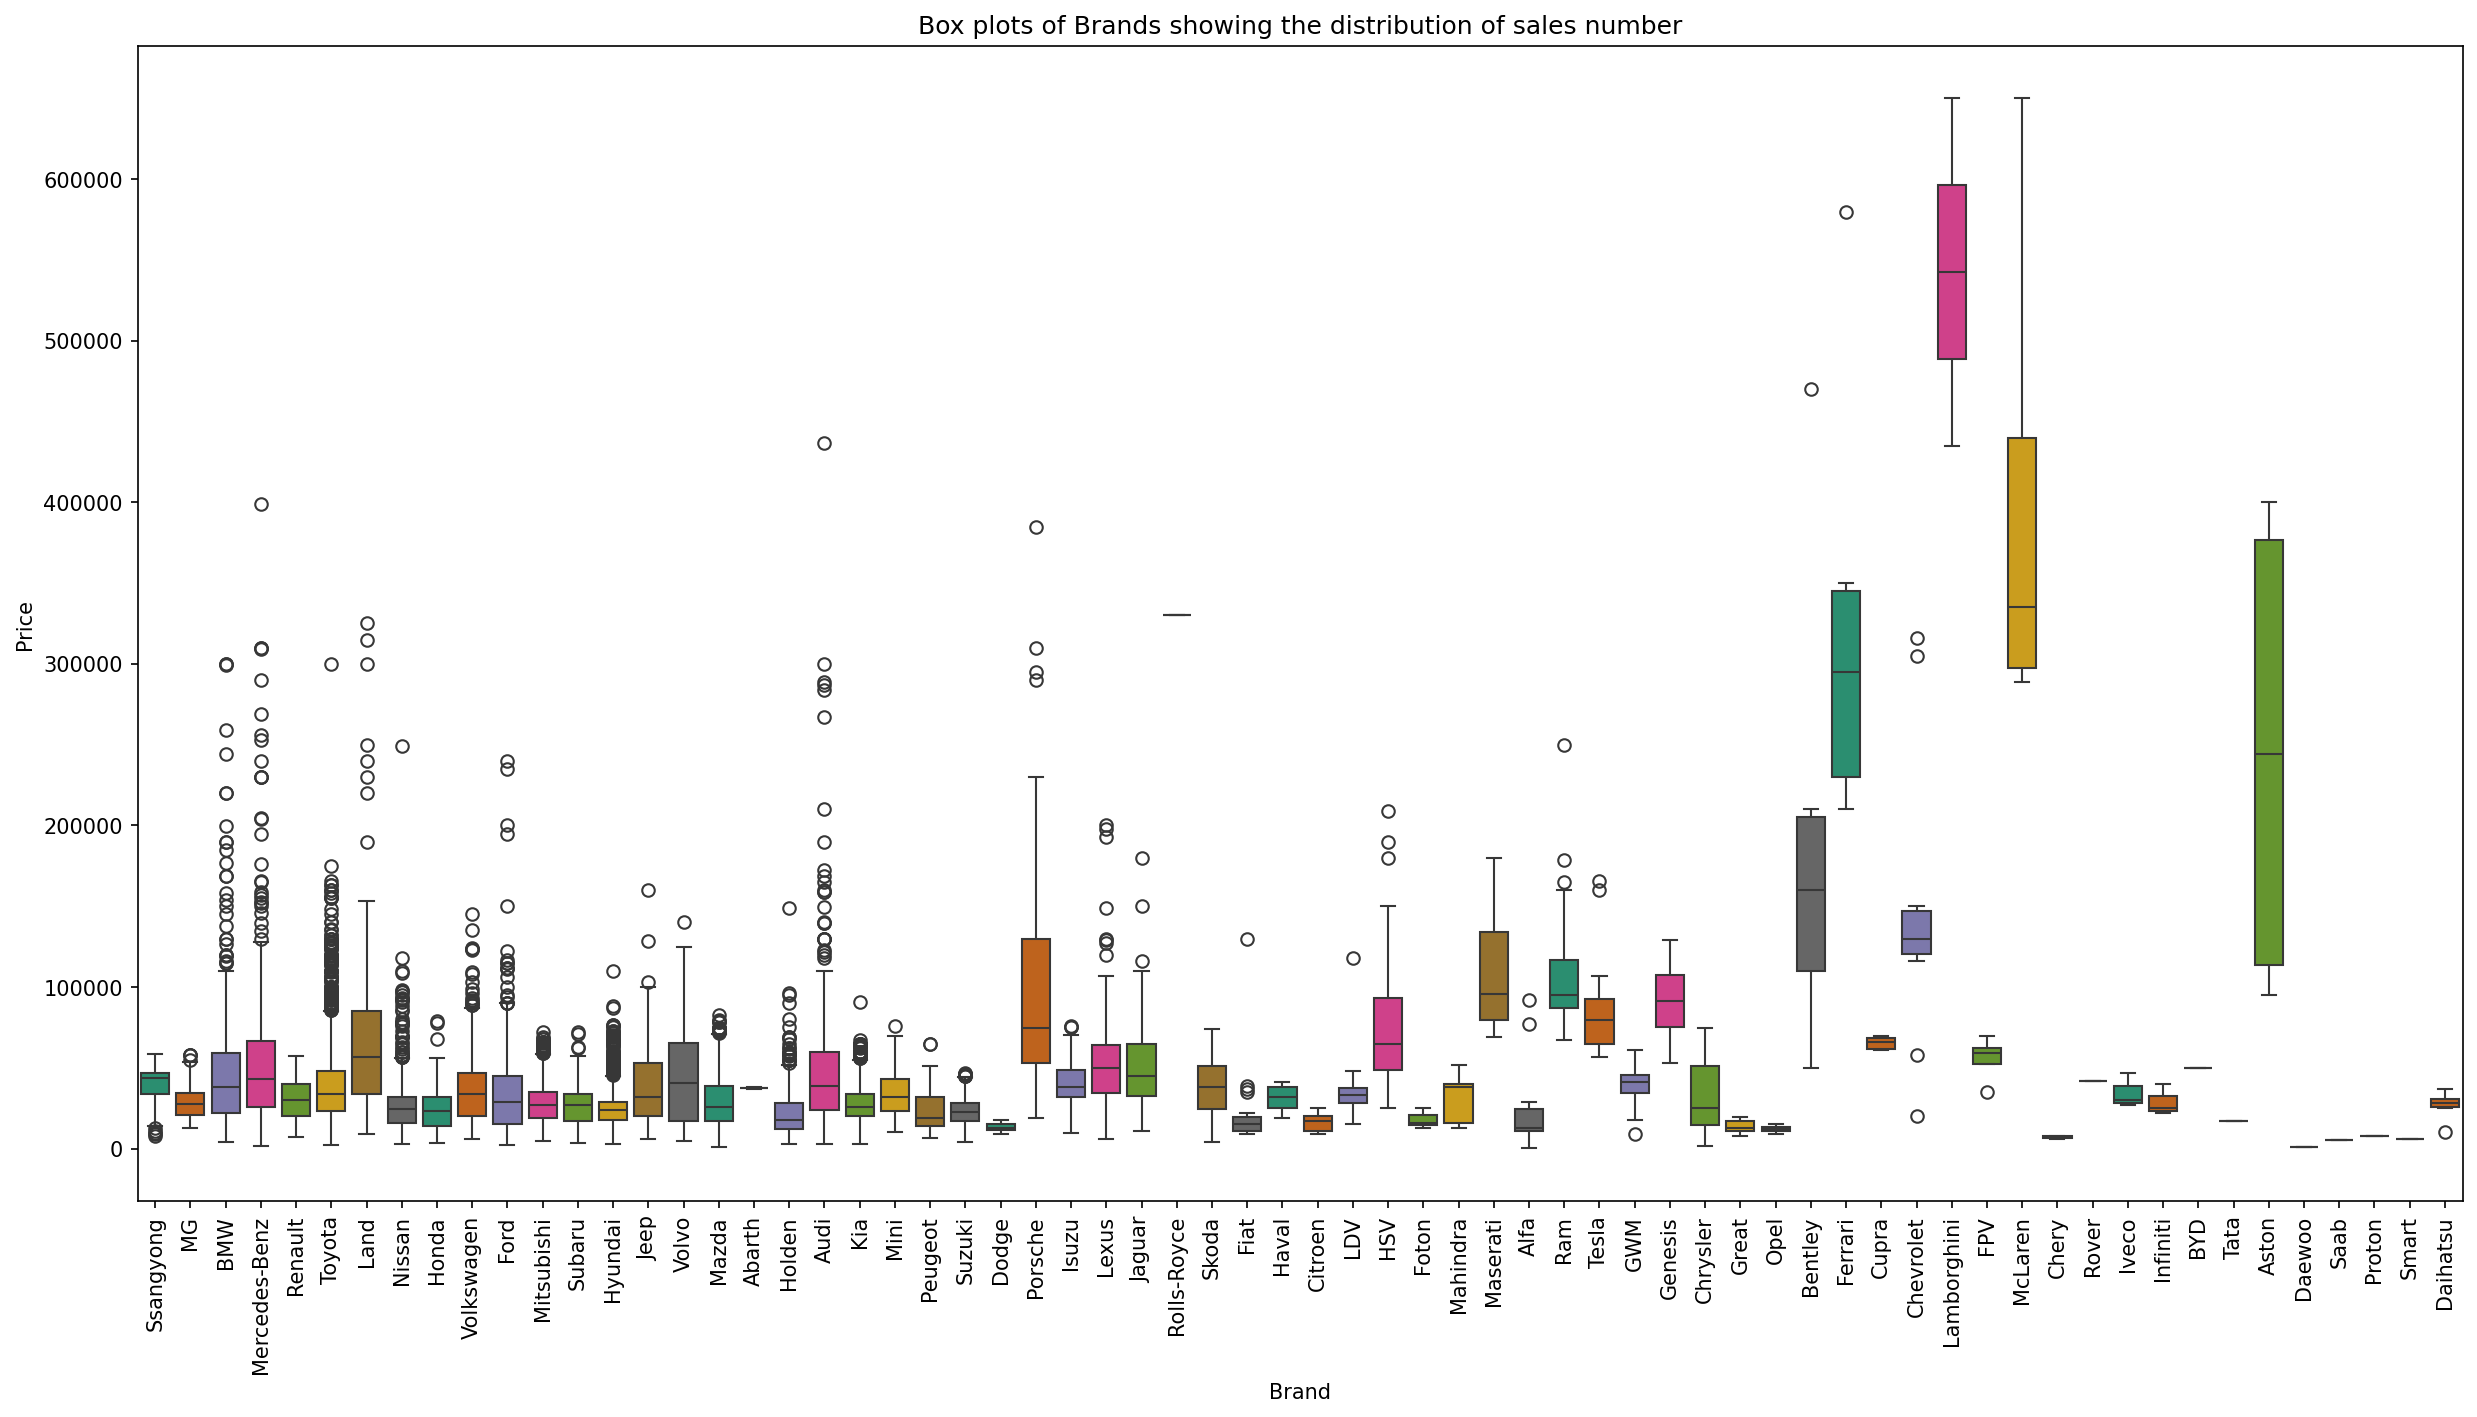

In [29]:
plt.figure(figsize=(20,10),dpi=150)
sns.boxplot(x=df['Brand'],y=df['Price'],palette='Dark2')
plt.xticks(rotation=90)
plt.title('Box plots of Brands showing the distribution of sales number');

Lamborghini has the highest price range, followed by McLaren, Aston and Ferarri, while Nissan, Honda, Hyundai are some brands of affordable cars.

<Axes: >

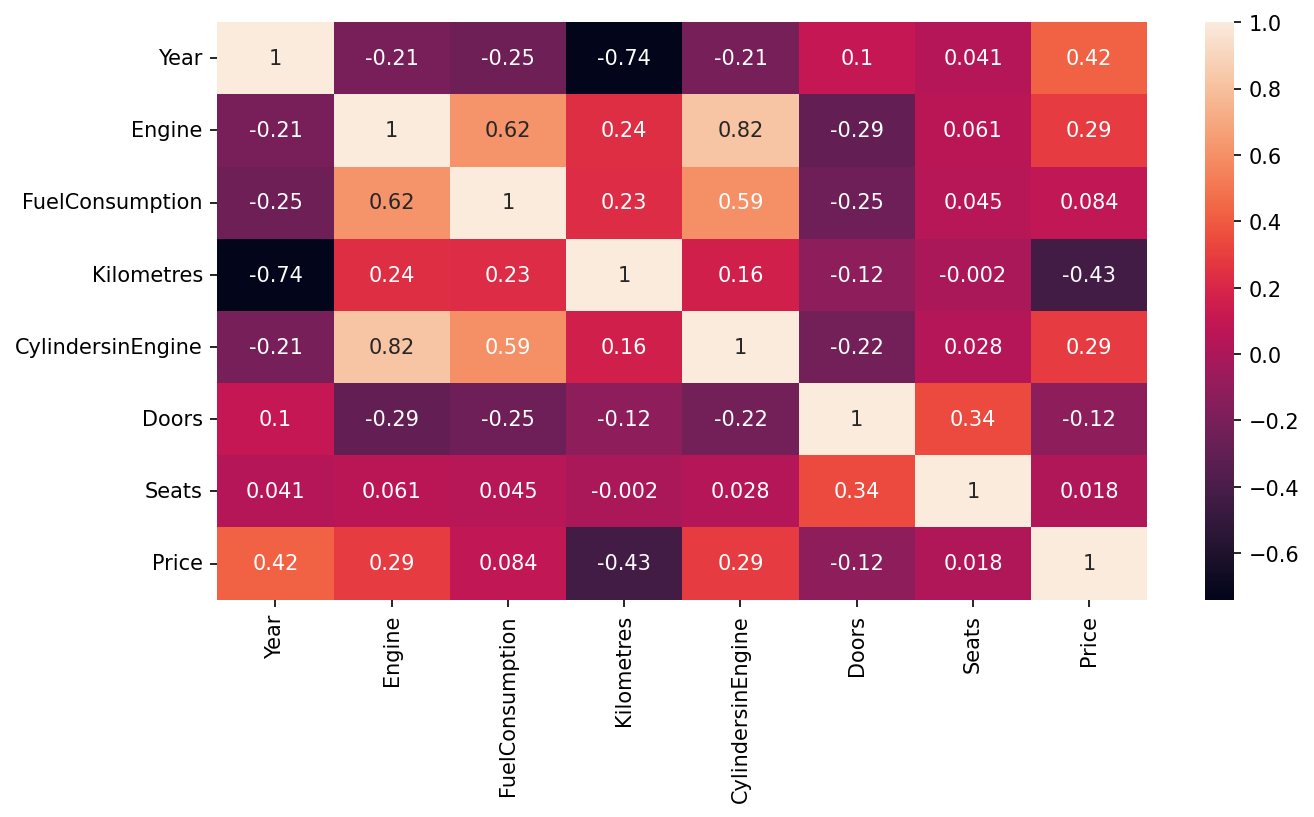

In [30]:
plt.figure(figsize=(10,5),dpi=150)
df_num = df.select_dtypes(['int32','float64'])
sns.heatmap(df_num.corr(),annot = True)

**`Insights from the heatmap`**
- The manufactured Year has strong negative correlation (-0.74) with the Kilometres covered by the car. This is due to the fact that after 2000 a large number of cars were manufactured or released that which had a low price. This is also significant of the fact that cars were popularised after 2000, and a large number of people started owning them.
- The feature FuelConsumption has high positive correlation (0.62) with Engine. This is because the amount of fuel consumed depends on the capacity of the engine.
- The feature CylindersInEngine has high positive correlation (0.82) with Engine. This is because the capacity of the engine depends on the number of cylinders used.
- Price has some negative correlation with Kilometres covered (-0.4) and some positive correlation with year of manufacture (0.36). 

Now we try to see the distribution of the continuous variables that are present in our dataset

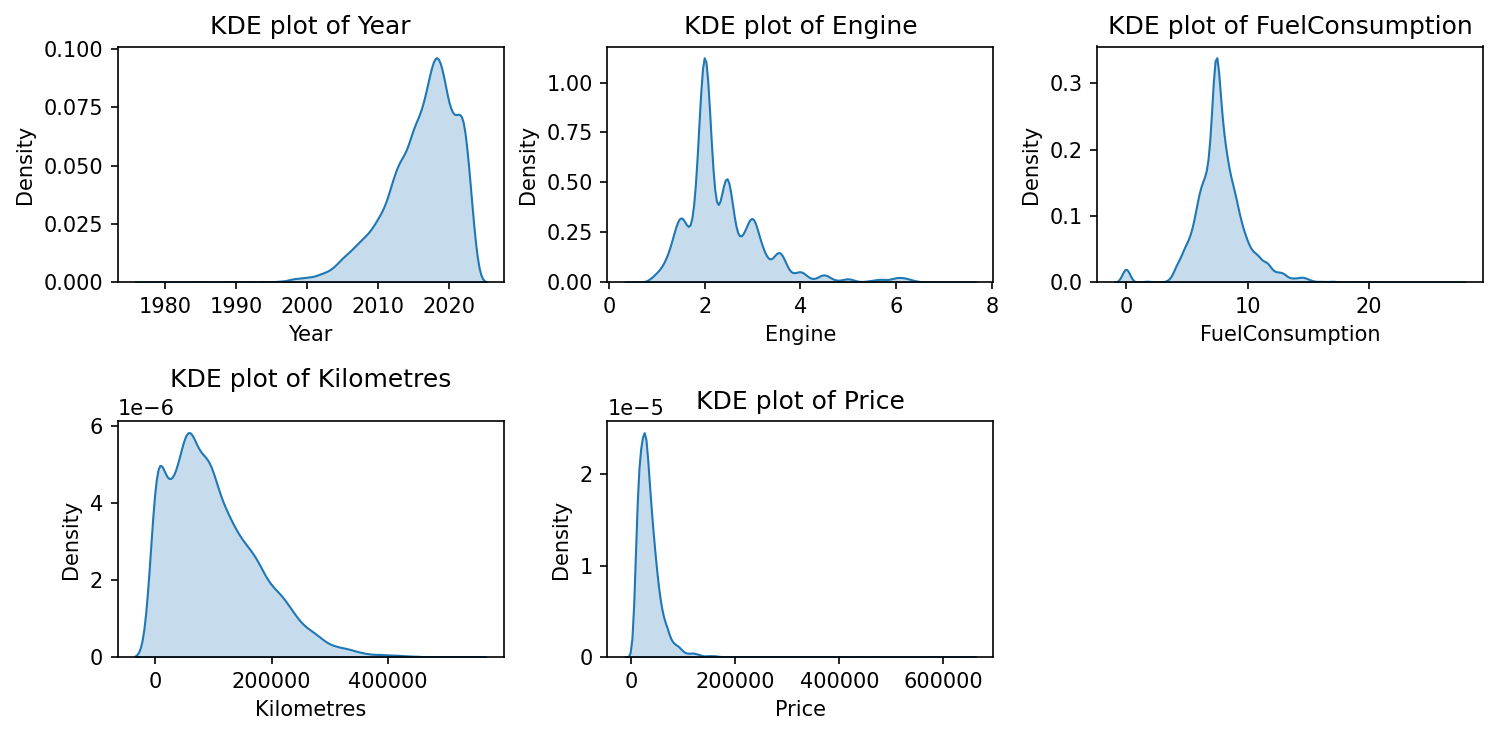

In [31]:
fig, axes= plt.subplots(2,3,figsize=(10,5),dpi=150)
k=0
col = df_num.drop(['CylindersinEngine','Doors', 'Seats'],axis=1).columns
for i in range(2):
    for j in range(3):
        if (k< len(col)):
            sns.kdeplot(data= df_num,x=col[k],ax=axes[i,j],fill = True)
            axes[i,j].set_title(f'KDE plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

Year has a high negative skewness while the other columns are positively skewed, with Price having the highest positive skewness. To see the measures of skewness of each column, we do the following steps.

In [33]:
df[['Year','Engine','FuelConsumption','Kilometres','Price']].skew()

Year              -1.075178
Engine             1.760236
FuelConsumption    0.217256
Kilometres         0.973705
Price              5.541073
dtype: float64

# Data Preparation

In [34]:
from sklearn.preprocessing import  LabelEncoder
LE=LabelEncoder()
df['Brand']=LE.fit_transform(df['Brand'])

In [35]:
data=df
df_get_dummies=['UsedOrNew','Transmission','DriveType','FuelType','BodyType']
for col in df_get_dummies :
  onehotcoding=pd.get_dummies(df[col], prefix=col).astype(int)
  df = pd.concat([df, onehotcoding], axis=1)

In [36]:
df.drop(['UsedOrNew','Transmission','DriveType','FuelType','BodyType','FuelType','FuelType','Location'],axis=1,inplace=True)

# **`Checking for the assumptions before fitting a regression model.`**

## 1. Checking for Outliers 

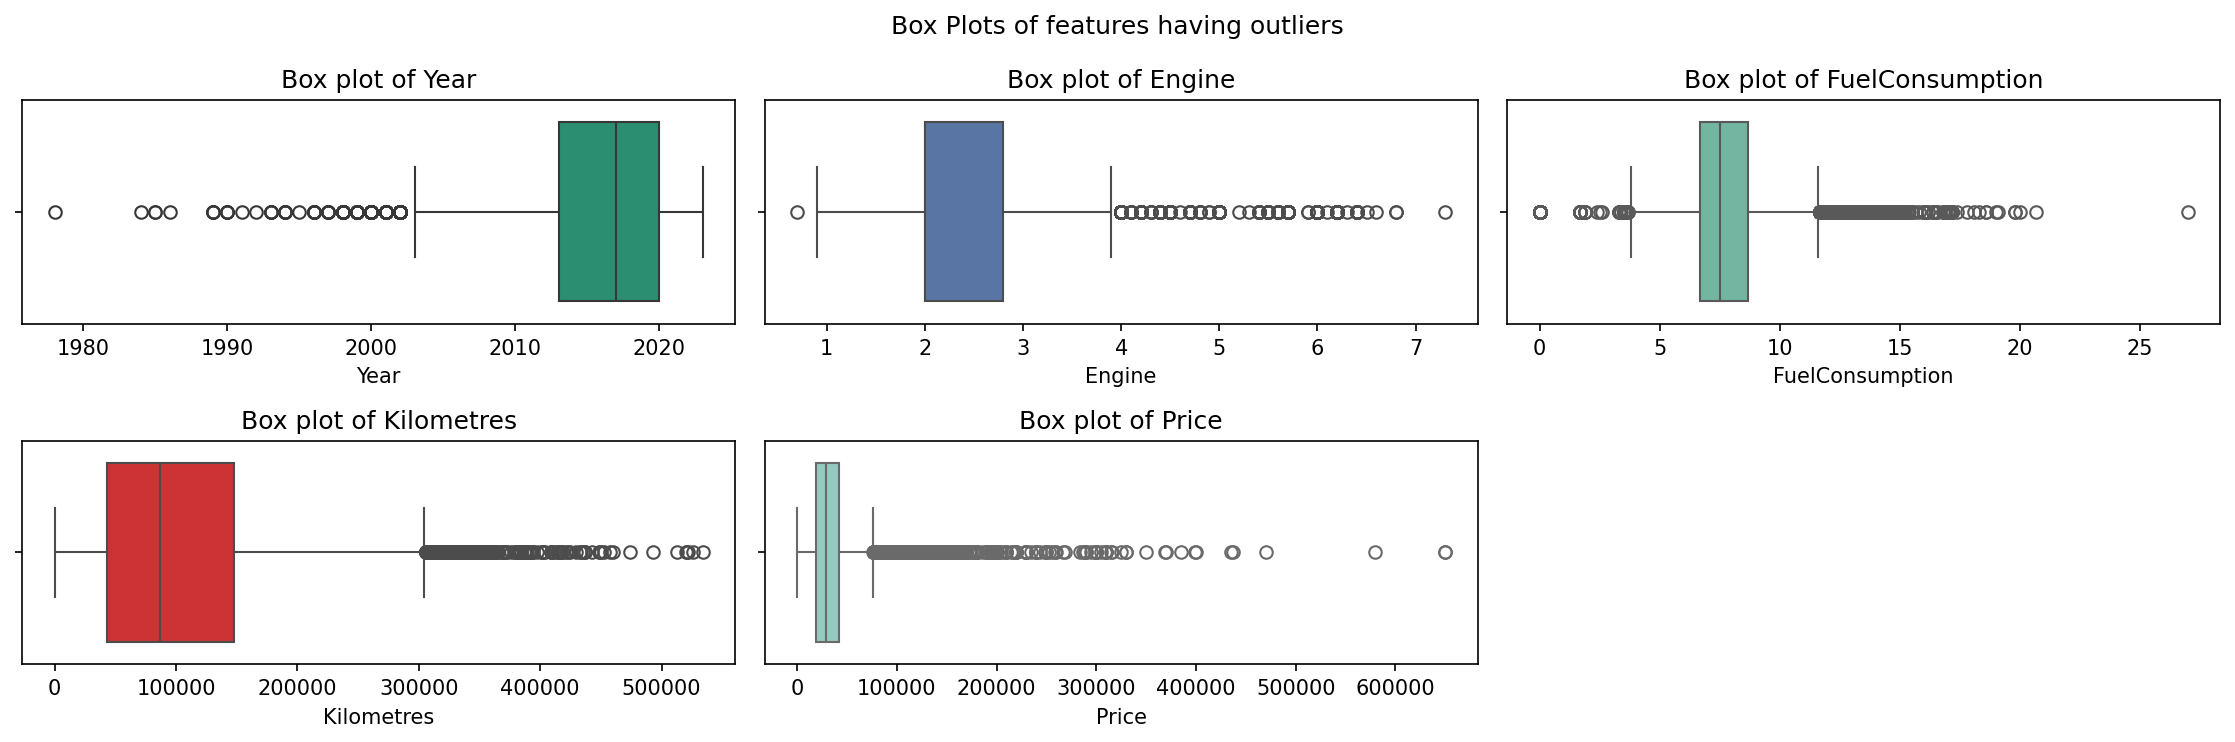

In [37]:
colors =['Dark2','deep','Set2','Set1','Set3']
fig, axes= plt.subplots(2,3,figsize=(15,5),dpi=150)
plt.suptitle('Box Plots of features having outliers')
k=0
col = df_num.drop(['CylindersinEngine','Doors', 'Seats'],axis=1).columns
for i in range(2):
    for j in range(3):
        if (k< len(col)):
            sns.boxplot(data= df,x=col[k],ax=axes[i,j],palette=colors[k])
            axes[i,j].set_title(f'Box plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

First we will eliminate the outliers, so that many of the influential factors which can make the assumption failures are discarded.

### Outlier Elimination using IQR method

In [38]:
#removing the outliers

def outlier(a):
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3-Q1
    L = Q1 - 1.5*IQR
    U = Q3 + 1.5*IQR
    return(L,U)

In [39]:
df = df.loc[df['Year'] >= outlier(df['Year'])[0]]
df = df.loc[df['Year'] <= outlier(df['Year'])[1]]

df = df.loc[df['Engine'] >= outlier(df['Engine'])[0]]
df = df.loc[df['Engine'] <= outlier(df['Engine'])[1]]

df = df.loc[df['FuelConsumption'] >= outlier(df['FuelConsumption'])[0]]
df = df.loc[df['FuelConsumption'] <= outlier(df['FuelConsumption'])[1]]

df = df.loc[df['Price'] >= outlier(df['Price'])[0]]
df = df.loc[df['Price'] <= outlier(df['Price'])[1]]

df = df.loc[df['Kilometres'] >= outlier(df['Kilometres'])[0]]
df = df.loc[df['Kilometres'] <= outlier(df['Kilometres'])[1]]

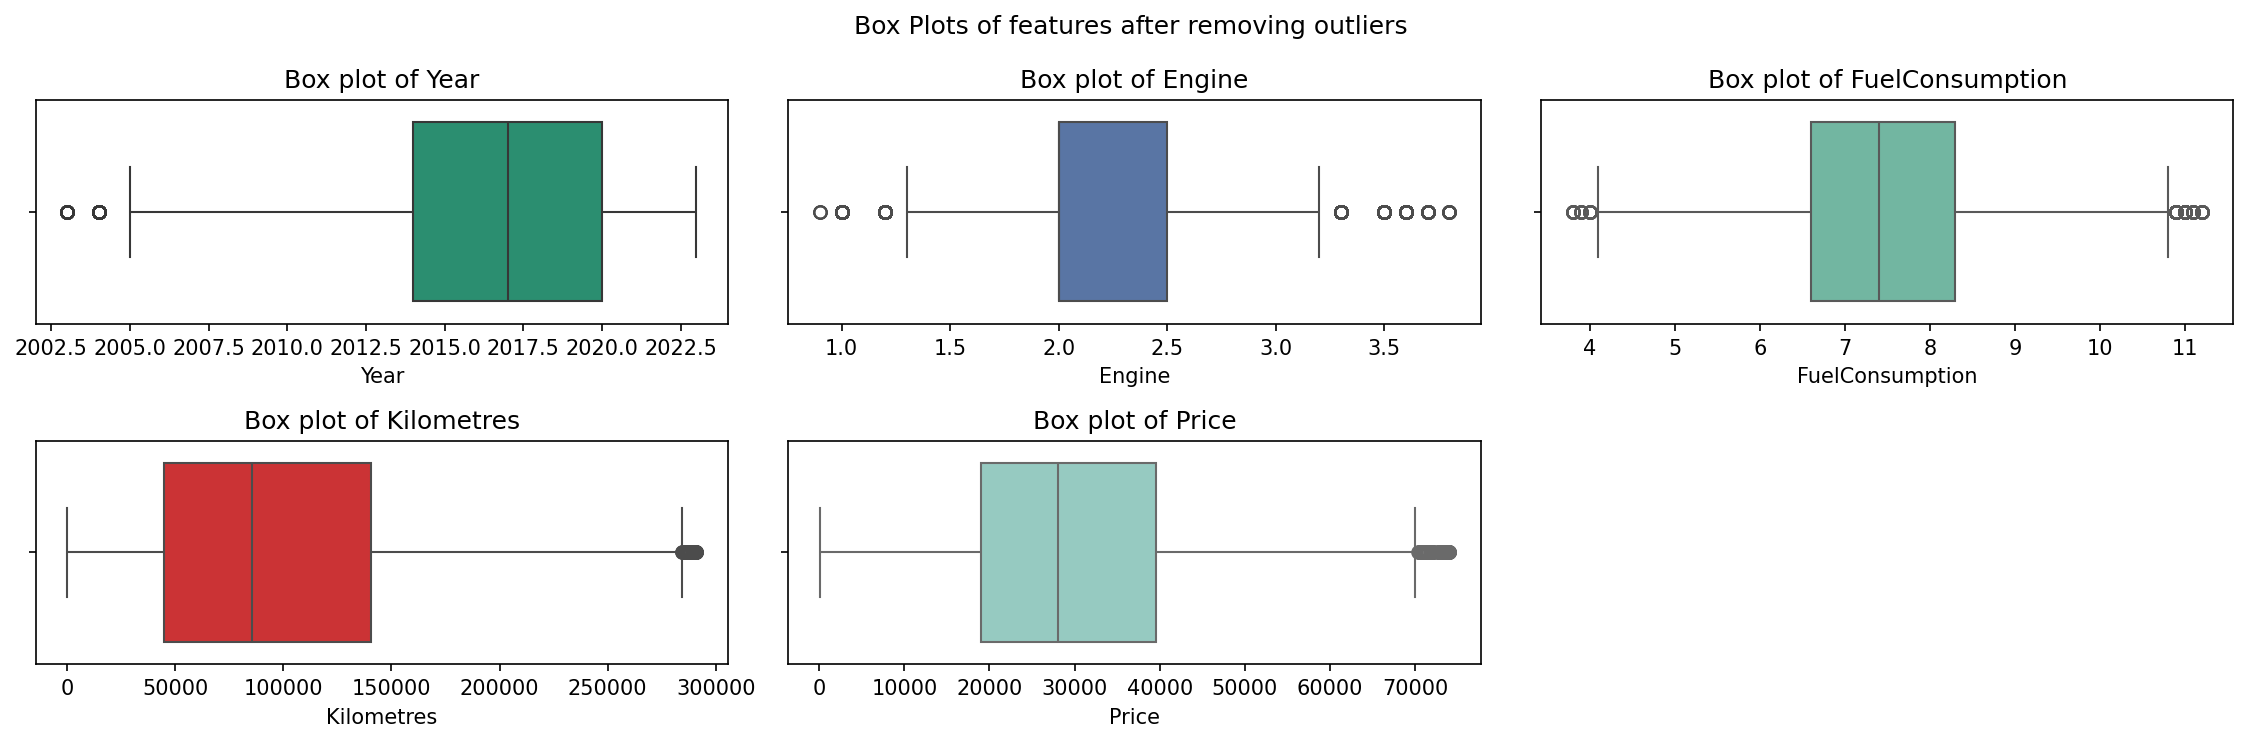

In [40]:
colors =['Dark2','deep','Set2','Set1','Set3']
fig, axes= plt.subplots(2,3,figsize=(15,5),dpi=150)
plt.suptitle('Box Plots of features after removing outliers')
k=0
col = df_num.drop(['CylindersinEngine','Doors', 'Seats'],axis=1).columns
for i in range(2):
    for j in range(3):
        if (k< len(col)):
            sns.boxplot(data= df,x=col[k],ax=axes[i,j],palette=colors[k])
            axes[i,j].set_title(f'Box plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

In [42]:
y = df['Price']
x = df.drop(['Price'],axis=1)

## 2. Checking for the non-linearity of the response-predictor relationship.

In [43]:
import statsmodels.formula.api as sm
model = sm.ols('y~x',data=df).fit()

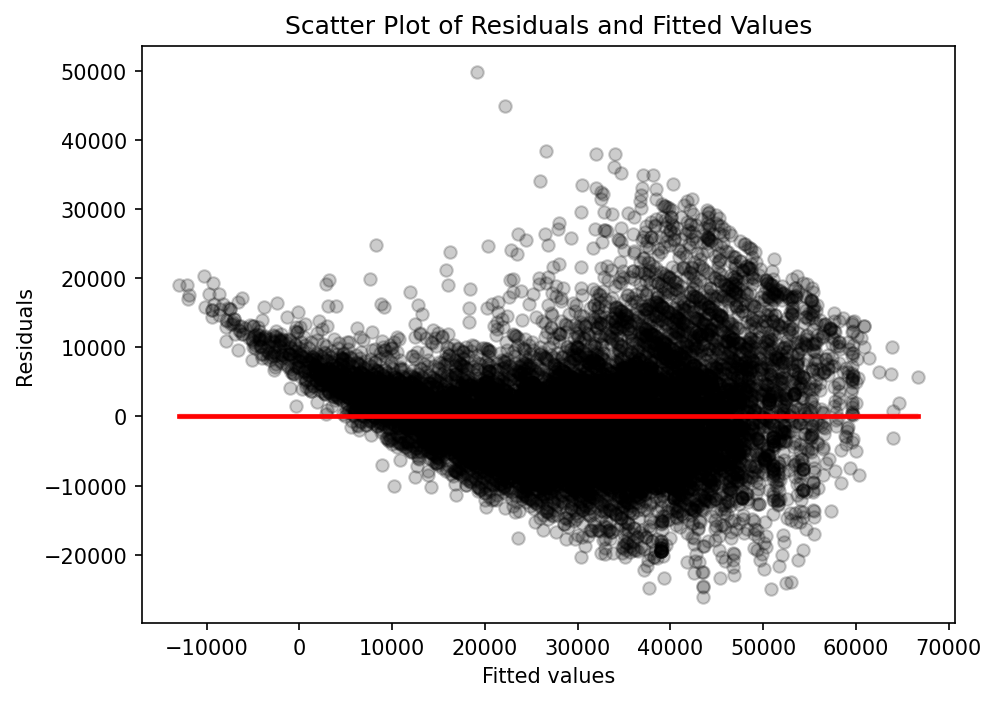

In [44]:
plt.figure(figsize=(7,5),dpi=150)
sns.regplot(x=model.predict(x),y= model.resid,line_kws = {"color": "red"},scatter_kws = {"color": "black", "alpha": 0.2})
plt.xlabel('Fitted values')
plt.ylabel("Residuals")
plt.title('Scatter Plot of Residuals and Fitted Values');

There is clearly a presence of pattern that indicates a problem with some aspect of the linearity of the model.

## 3. Checking for the presence of correlation between the error terms in the model.

We use Durbin – Watson (DW) statistic to check for the presence of autocorrelation between the error terms. The statistic must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation.

In [45]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

1.9629390218616114

We notice that the statistic almost fetches a value of 2. So we discard the idea that there is any autocorrelation between the error terms of the model.

## 4. Checking for heteroscedasticity.

Earlier while checking for the non-linearity of the response-predictor relationship, we noticed that the Residuals vs fitted values scatter plot shows a funnel shape figure which also signifies the presence of heteroscedasticity. However, for further clarification we carry out yet another test to check for the heteroscedasticity.

We use Breush Pagan Test for which the hypothesis is given by-

- **The null hypothesis (H0):** Heteroscedasticity is absent.
- **The alternative hypothesis: (Ha):** Heteroscedasticity is present.

In [46]:
from statsmodels.stats.api import het_breuschpagan
from statsmodels.compat import lzip

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

test_result = het_breuschpagan(model.resid,model.model.exog)

lzip(names,test_result)

[('Lagrange multiplier statistic', 1194.6906983428637),
 ('p-value', 1.7119574182485586e-227),
 ('f-value', 43.715218633894004),
 ('f p-value', 3.5306812073104604e-244)]

Now if we consider a significance level of 5%, then we see that the p-value for the given test is very very small and close to 0, hence we can say that we can reject the null hypothesis, i.e., we have enough evidence against the null hypothesis. So there is some heterscedasticity present in the data.

## 5. Checking for the multicollinearity in the data

We use Variance Inflation Factor to identify which actors have multicollinearity.

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

x_new = df[['Brand','Year','Engine','FuelConsumption','Kilometres','CylindersinEngine','Doors','Seats']]

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["FEATURE"] = x_new.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_new.values, i) for i in range(len(x_new.columns))] 
  
vif_data

,FEATURE,VIF
0,Brand,6.736791
1,Year,138.353497
2,Engine,44.015481
3,FuelConsumption,53.092810
4,Kilometres,3.409703
5,CylindersinEngine,93.322303
6,Doors,54.434961
7,Seats,35.446915


We see that there VIF values are very high for Year, Engine, Fuel Consumption, CylindersInEngine, Doors, Seats. So there exist some multicollinearity between these factors.

## 6. Checking for any influential points in the datset.

To find the influential points we find the Cook's distance for each point and visualize them with a scatterplot of x vs cook's distance. 

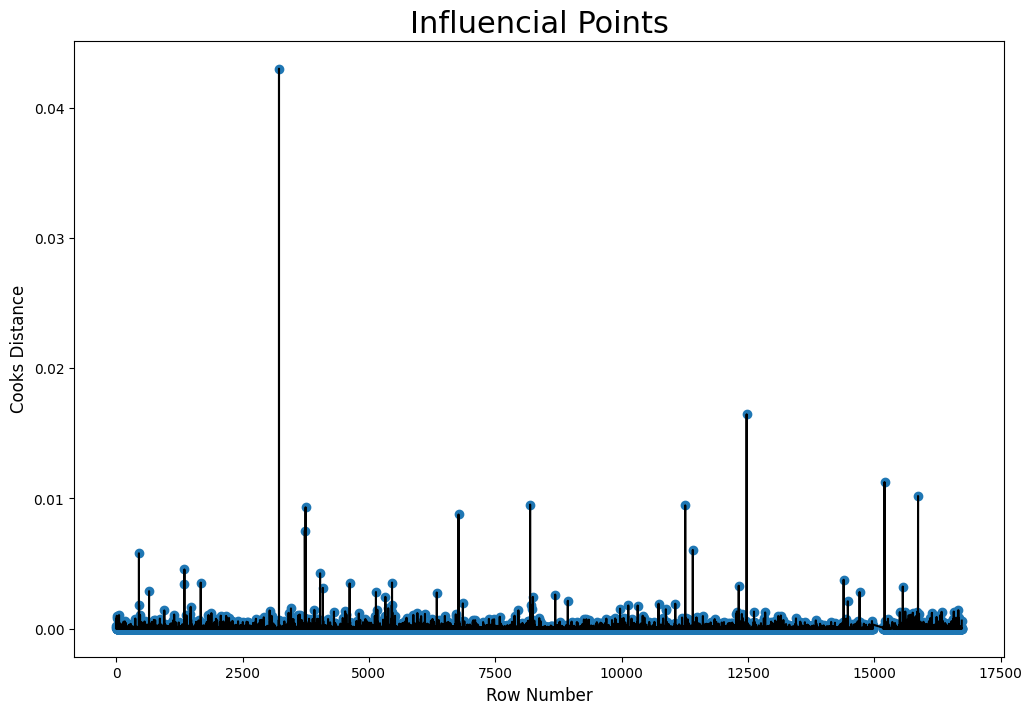

In [48]:
cooks = model.get_influence().cooks_distance

plt.figure(figsize = (12, 8))
plt.scatter(x.index, cooks[0])
plt.plot(x.index, cooks[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22);

Now we find how many influencial points are there that is shown in the above scatterplot

In [49]:
mean_cooks = np.mean(cooks[0])

influencial_points = df.index[cooks[0] > 4*mean_cooks]
len(influencial_points)

0

So there are no influential points in the dataset.

## 7. Checking for the normality of the response variable.

 First we plot the q-q plot of the residuals corresponding to the above fitted model.

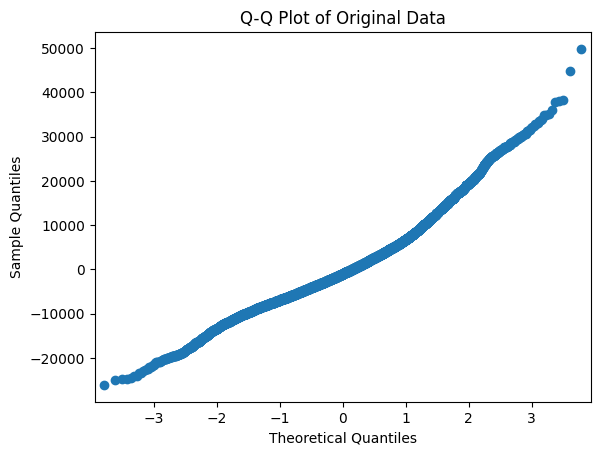

In [50]:
import statsmodels.api as sa
sa.qqplot(model.resid)
plt.title('Q-Q Plot of Original Data');

We can see that the points do not form a straight line and is very much deflecting. So we conclude that the normality is absent. For better understanding we carry out the Shapiro Wilk test.

In [51]:
import scipy.stats as stats
stats.shapiro(y)

ShapiroResult(statistic=0.9600489139556885, pvalue=0.0)

The p-value is 0.0 owing to the fact that we have to reject the null hypothesis of normality.

Next this we use a polynomial curve to transform the independent variables to obtain a linear relationship between the response and the independent variables. We use a polynomial curve over Box-Cox transformation since it can handle the non-monotonic non-normalities of the data.

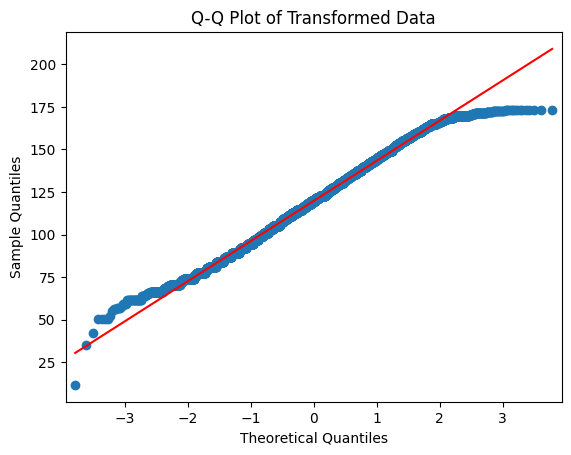

Optimal lambda: 0.37325825764469467


In [52]:
Y_transformed, lambda_optimal = stats.boxcox(y)

# Visualize transformed data
sa.qqplot(Y_transformed, line='s')
plt.title('Q-Q Plot of Transformed Data')
plt.show()

print(f'Optimal lambda: {lambda_optimal}')

Now we plot for the Residuals vs fitted values scatter plot in order to have a visual check where a fan or funnel shape indicates heteroscedasticity.

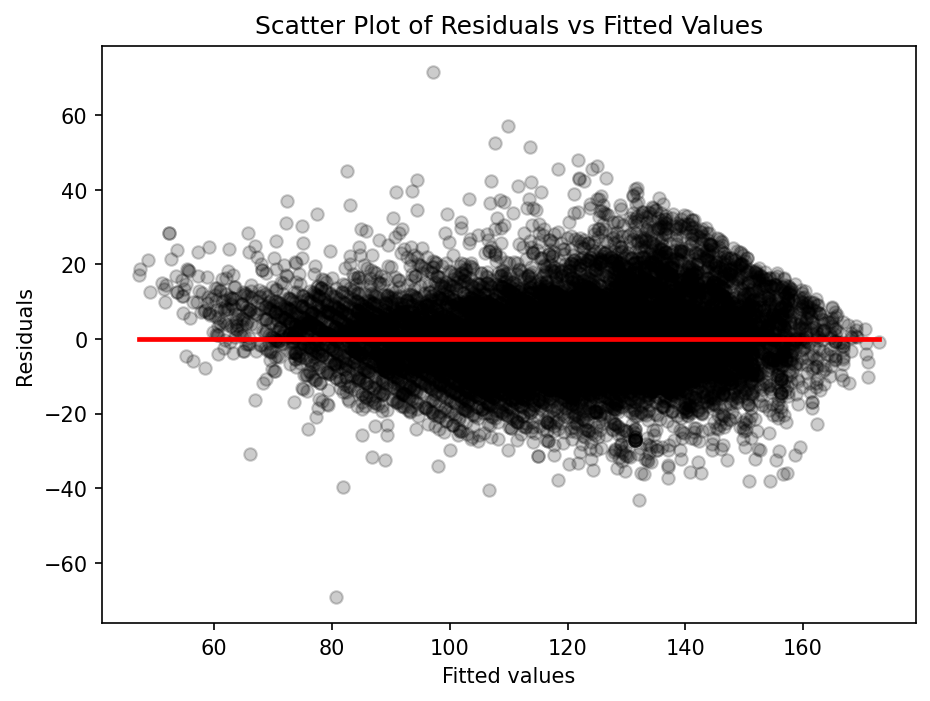

In [53]:
plt.figure(figsize=(7,5),dpi=150)
new_model = sm.ols('Y_transformed~x',data={'Y': Y_transformed, 'X': x}).fit()
sns.regplot(x=new_model.predict(x),y= new_model.resid,line_kws = {"color": "red"},scatter_kws = {"color": "black", "alpha": 0.2})
plt.xlabel('Fitted values')
plt.ylabel("Residuals")
plt.title('Scatter Plot of Residuals vs Fitted Values');

The funnel shape is somewhat gone so we can conclude that the data has no heteroscedasticity. Hence, we use this data for further model building. Any other transformations or changes in the data will only make the data more difficult to use for model building.

# **`Model Building`**

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [55]:
X_train,X_test,y_train,y_test = train_test_split(x,Y_transformed,test_size=0.2 ,random_state=42)

In [56]:
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_scaled,y_train)

LinearRegression()

In [59]:
lr_preds= lr_model.predict(X_test_scaled)

## Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeRegressor()

In [61]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [62]:
gs_dt_model=GridSearchCV(dt_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)
print(gs_dt_model.fit(X_train,y_train).best_params_)
gs_dt_model.best_params_

{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'splitter': 'best'}


{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [63]:
# modelling withe the best features
dt_model = DecisionTreeRegressor(max_depth=9,max_features=None,max_leaf_nodes=None,min_samples_leaf=5,splitter='best')
dt_model.fit(X_train,y_train)
#predictions
dt_preds= dt_model.predict(X_test)

## Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rfg_model = RandomForestRegressor()

In [66]:
# Hyper parameters range intialization for tuning 

parameters={"n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]}

In [67]:
gs_rfg_model = GridSearchCV(rfg_model,param_grid=parameters,cv=3)
gs_rfg_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [68]:
gs_rfg_model.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 30}

In [69]:
# modelling with the the best features
rfg_model = RandomForestRegressor(bootstrap=False,max_features='log2',min_samples_split=4,n_estimators=30)
rfg_model.fit(X_train,y_train)
#predictions
rfg_preds = rfg_model.predict(X_test)

## Gradient Boosting Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
gb_model = GradientBoostingRegressor()

In [72]:
# Hyper parameters range intialization for tuning 

parameters={"n_estimators"      : [10,50,100,500],
            "learning_rate"     : [0.0001, 0.001, 0.01, 0.1, 1.0],
            'max_depth'         :[3,4,5,6]}

In [73]:
gs_gb_model = GridSearchCV(estimator=gb_model, param_grid=parameters, n_jobs=-1, cv=3)

In [74]:
gs_gb_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 500]})

In [75]:
gs_gb_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [76]:
# modelling with the the best features
gb_model = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=500)
gb_model.fit(X_train,y_train)
#predictions
gb_preds = gb_model.predict(X_test)

# **`Model Evaluation`**

In [77]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [93]:
def adj_r2_score(preds):
    return(1- (1-r2_score(preds,y_test))*( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 ))

In [104]:
def summ(preds):
    return( [r2_score(preds,y_test),adj_r2_score(preds),np.sqrt(mean_squared_error(preds,y_test)),
             mean_absolute_error(preds,y_test),mean_absolute_percentage_error(y_test,preds)])

In [105]:
metric = pd.DataFrame([summ(lr_preds),summ(dt_preds),summ(rfg_preds),summ(gb_preds)],columns=['R-Squared Score','Adjusted R-Squared','Root Mean Squared Error','Mean Absolute Error','Mean Absolute Percentage Error'], index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','Gradient Boosting Regressor'])

In [181]:
print('Table 1>')
metric

Table 1>


,R-Squared Score,Adjusted R-Squared,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
Linear Regression,0.729521,0.728775,11.001517,8.414697,0.072150
Decision Tree Regressor,0.778447,0.777837,10.368575,7.802146,0.067706
Random Forest Regressor,0.886616,0.886304,7.410254,5.377456,0.046982
Gradient Boosting Regressor,0.910483,0.910236,6.809261,4.984057,0.043345


## **`Feature Importance`**

Each feature in a datase affects the models' predictions differently. Some features affect more, while others affect less. So now, I will try to find those features present in this dataset, that have larger effect on my models' predictions. 

In [81]:
importance = gb_model.feature_importances_
Feature, Score =[],[]
for i,v in enumerate(importance):
    Feature.append(x.columns[i])
    Score.append(np.round(v,5))

imp_fea = pd.DataFrame(data={'Features':Feature,'Score':Score})

In [82]:
imp = imp_fea[imp_fea['Score']>imp_fea.sort_values(by='Score',ascending=False)['Score'].mean()]

In [83]:
print('The most important features along with their scores are:-')
imp

The most important features along with their scores are:-


,Features,Score
0,Brand,0.06360
1,Year,0.55274
2,Engine,0.06528
4,Kilometres,0.09650
15,DriveType_Front,0.08500
25,FuelType_Unleaded,0.05365


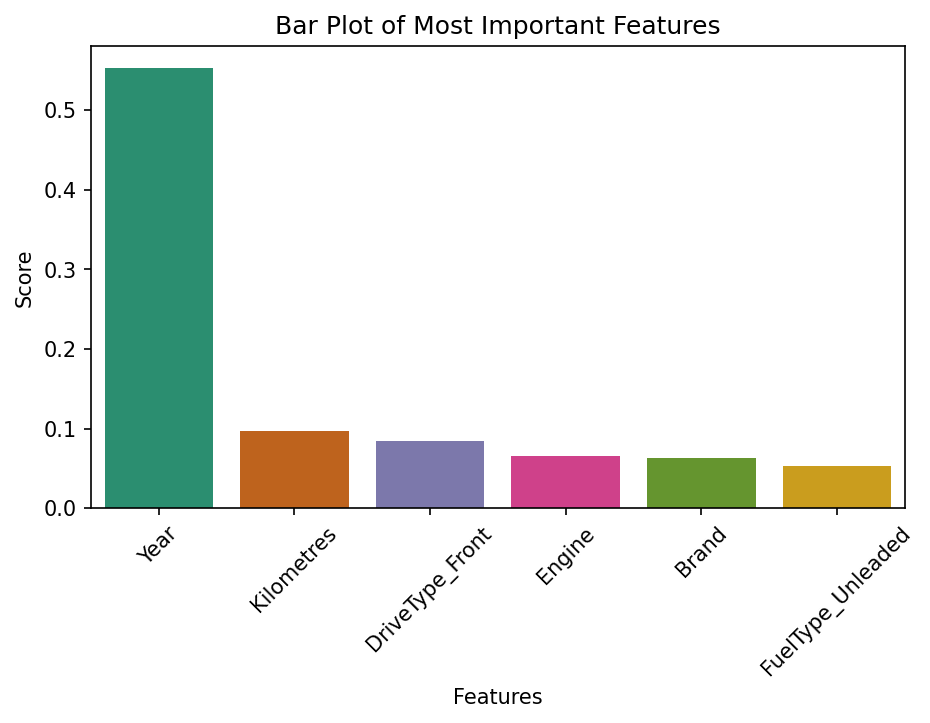

In [84]:
plt.figure(figsize=(7,4),dpi=150)
sns.barplot(data=imp.sort_values('Score',ascending=False),x=imp.sort_values('Score',ascending=False)['Features'],y='Score',palette='Dark2')
plt.xticks(rotation=45)
plt.title('Bar Plot of Most Important Features');

Year, Kilometres, DriveType_Front, Engine, Brand and FuelType_Unleaded are the features that have the most effect on our models' predictions.

# **`Conclusion`**

## Insights from the data:

- The brand which had the highest sales in the Australian market in the year 2023 is **Toyota**, followed by **Hyundai**, **Mazda** and **Holden**.
- The brand of the vehicle having the least sales is **Smart**.
- Used, automatic cars were sold the most.
- **New South Wales** had the highest number of sales of cars, followed by the state of **Victoria**.
- Car Body type of **SUV** are most in demand.
- **Lamborghini** has the highest price range, followed by **McLaren**, **Aston** and **Ferarri**, while **Nissan**, **Honda**, **Hyundai** are some brands of affordable cars.

## Insights from modelling-

- **Year, Kilometres, DriveType_Front, Engine, Brand** and **FuelType_Unleaded** are the most important features affecting our model's prediction.
- From the table 1, we notice that the metrics - R2 Score is the highest and, Root Mean Squared Error, Mean Absolute Error, Mean Absolute Percentage Error are least for the **Gradient Boosting Regressor**.
    - The Gradient Boosting Regressor yields a R-squared value of 0.91 which is close to 1. 
    - It yields a Root Mean Squared Error of 6.809261,
    - a Mean Absolute Error of 4.984057, and 
    - a Mean Absolute Percentage Error of 0.043345, which are comparatively lesser than that o other models.
So it is the best fitted model for the data, which can help predict the car prices with the most accuracy.